In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## load data

Text(0.5, 0, 'Life expectancy')

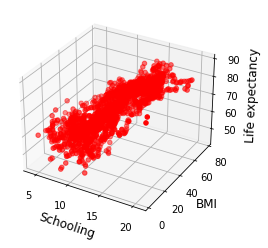

In [13]:
ds = pd.read_csv('Life Expectancy Data.csv')
ds = ds.dropna()
X = ds[['Schooling', ' BMI ']]
X = X.to_numpy()
y = ds['Life expectancy ']
y = y.to_numpy()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y, c='r', marker='o')
ax.set_xlabel('Schooling',fontsize=12)
ax.set_ylabel('BMI',fontsize=12)
ax.set_zlabel('Life expectancy',fontsize=12)

## Standardization using z-score

Text(0.5, 0, 'Life expectancy')

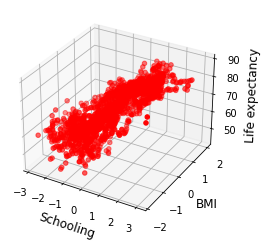

In [14]:
%matplotlib inline
x_b = np.c_[np.ones((len(X),1)),X]
nf,nc=x_b.shape
x_bs=x_b
for it in range(1,nc):
    m=np.mean(x_b[:,it])
    std=np.std(x_b[:,it])
    x_bs[:,it]=(x_b[:,it]-m)/std

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_bs[:,1], x_bs[:,2], y, c='r', marker='o')
ax.set_xlabel('Schooling',fontsize=12)
ax.set_ylabel('BMI',fontsize=12)
ax.set_zlabel('Life expectancy',fontsize=12) 

## Gradiente descendente clásico

break


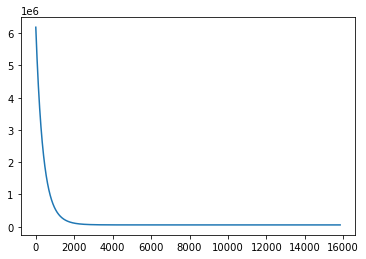

Iterations: 15836
Norm Grad: 0.000001
Mimun cost: 56484.297662
DG: theta_0=69.302299 	 theta_1=5.422203, 	 theta_2=1.759034


In [15]:
%matplotlib inline
N=len(y)
theta = np.array([[30],[30],[30]])
ep=1e-6
lr =1e-3
n_iter = 20000
j_cost= np.zeros([n_iter])
y=y.reshape((len(y), 1))
for it in range(n_iter):
    #Gradient
    pred = np.dot(x_bs,theta)
    h=(pred - y)
    si=-lr*(1/N)*(x_bs.T.dot(h))
    theta = theta + si
    j_cost[it]=np.sum(np.square(h))
    
    if np.linalg.norm(si)<ep:
        print('break')
        break
fig = plt.figure()
plt.plot(j_cost[0:it+1])
plt.show()
# print(np.c_[pred,y,h])
print("Iterations: %d" %it)
print("Norm Grad: %f" %np.linalg.norm(si))
print("Mimun cost: %f" %j_cost[it])
print("DG: theta_0=%f \t theta_1=%f, \t theta_2=%f" %(theta[0],theta[1],theta[2]))

In [16]:
%matplotlib qt

xc = np.arange(np.min(x_bs[:,1]), np.max(x_bs[:,1]), 0.01)
yc = np.arange(np.min(x_bs[:,2]), np.max(x_bs[:,2]), 0.01)
plane=np.zeros([len(xc),len(yc)])

for i in range(len(xc)):
    for j in range(len(yc)):
        plane[i,j]=np.dot(np.c_[1,xc[i],yc[j]],theta)
B, M = np.meshgrid(yc, xc)
fig1 = plt.figure()
ax = fig1.add_subplot(111, projection='3d')
surf = ax.plot_surface(B,M, plane,
                       linewidth=0, antialiased=False)
ax.scatter(x_bs[:,1], x_bs[:,2], y, c='r', marker='o')
ax.set_xlabel('Schooling',fontsize=12)
ax.set_ylabel('BMI',fontsize=12)
ax.set_zlabel('Life expectancy',fontsize=12) 

Text(0.5, 0, 'Life expectancy')

## Gradiente descendente por mini lotes

(1649, 3)


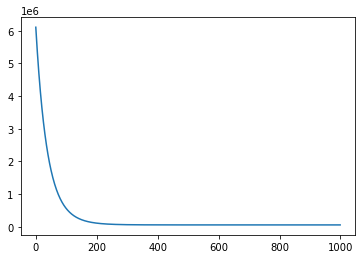

Iterations: 999
Norm Grad: 0.085168
Mimun cost: 56485.945987
DG: theta_0=69.300522 	 theta_1=5.402452, 	 theta_2=1.778846


In [17]:
%matplotlib inline
N=len(y)
theta = np.array([[30],[30],[30]])
# ep=1e-6
lr =1e-2
n_iter = 1000
j_cost= np.zeros([n_iter])
batch_size =20
n_batches = int(N / batch_size)
X= x_bs
Y=y
print(x_bs.shape)
for it in range(n_iter):
    cost = 0.0
    indices = np.random.permutation(N)
    X = X[indices,:]
    y = y[indices]
    for i in range(0,N,batch_size):
        X_i = X[i:i+batch_size,:]
        y_i = y[i:i+batch_size]          
        prediction = np.dot(X_i,theta)
        h=prediction - y_i
        si=-(1/N)*lr*( X_i.T.dot(h))
        theta = theta + si
        cost += np.sum(np.square(h))
    j_cost[it] = cost
    
prediction = np.dot( x_bs,theta)
h=prediction - y
si=-(1/N)*lr*( x_bs.T.dot(h))
fig2 = plt.figure()
plt.plot(j_cost[0:it+1])
plt.show()   
print("Iterations: %d" %it)
print("Norm Grad: %f" %np.linalg.norm(si))
print("Mimun cost: %f" %j_cost[it])
print("DG: theta_0=%f \t theta_1=%f, \t theta_2=%f" %(theta[0],theta[1],theta[2]))

In [7]:
%matplotlib qt

xc = np.arange(np.min(x_bs[:,1]), np.max(x_bs[:,1]), 0.01)
yc = np.arange(np.min(x_bs[:,2]), np.max(x_bs[:,2]), 0.01)
plane=np.zeros([len(xc),len(yc)])

for i in range(len(xc)):
    for j in range(len(yc)):
        plane[i,j]=np.dot(np.c_[1,xc[i],yc[j]],theta)
B, M = np.meshgrid(yc, xc)
fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')
surf = ax.plot_surface(B,M, plane,
                       linewidth=0, antialiased=False)
ax.scatter(x_bs[:,1], x_bs[:,2], y, c='r', marker='o')
ax.set_xlabel('Schooling',fontsize=12)
ax.set_ylabel('BMI',fontsize=12)
ax.set_zlabel('Life expectancy',fontsize=12) 

Text(0.5, 0, 'Life expectancy')

## Descenso de gradiente estocástico

In [8]:
def SGD(theta=[], grad=None, gd_params=[], f_params=[]):
    '''
    Descenso de gradiente estocástico
    
    Parámetros
    -----------
    theta     :   condicion inicial
    grad      :   funcion que calcula el gradiente
    
    gd_params :   lista de parametros para el algoritmo de descenso, 
                      nIter = gd_params['nIter'] número de iteraciones
                      alpha = gd_params['alpha'] tamaño de paso alpha
                      batch_size = gd_params['batch_size'] tamaño de la muestra
                      
    f_params  :   lista de parametros para la funcion objetivo, 
                      kappa = f_params['kappa'] parametro de escala (rechazo de outliers)
                      X     = f_params['X'] Variable independiente
                      y     = f_params['y'] Variable dependiente                   
                  
    Regresa
    -----------
    Theta     :   trayectoria de los parametros
                     Theta[-1] es el valor alcanzado en la ultima iteracion
    '''
    (high,dim) = f_params['X'].shape
    batch_size = gd_params['batch_size']
    
    nIter      = gd_params['nIter']
    alpha      = gd_params['alpha']
        
    Theta=[]
    for t in range(nIter):
        # Set of sampled indices
        smpIdx = np.random.randint(low=0, high=high, size=batch_size, dtype='int32')
        # sample 
        smpX = f_params['X'][smpIdx]
        smpy = f_params['y'][smpIdx]
        # parametros de la funcion objetivo
        smpf_params ={'kappa' : f_params['kappa'], 
                      'X'     : smpX , 
                      'y'     : smpy}
        
        p = grad(theta,f_params=smpf_params)
        theta = theta - alpha*p
        Theta.append(theta)
        
    return np.array(Theta)